In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
df_train = pd.read_csv("/kaggle/input/random-linear-regression/train.csv")
df_test = pd.read_csv("/kaggle/input/random-linear-regression/test.csv")

In [3]:
df_train.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [4]:
df_test.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


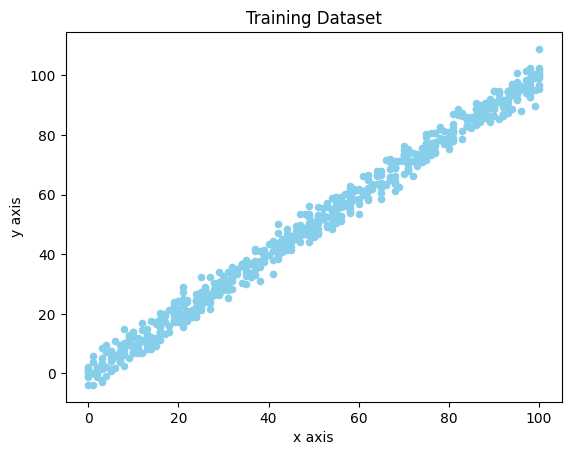

In [5]:
df_train.plot(x="x", y="y", kind="scatter", color="skyblue", xlabel="x axis", ylabel="y axis", title="Training Dataset");

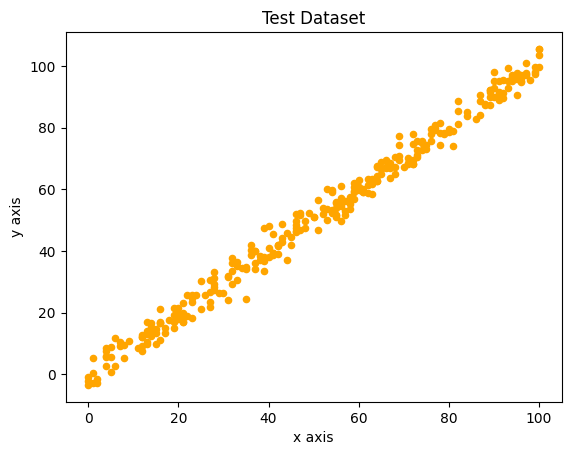

In [6]:
df_test.plot(x="x", y="y", kind="scatter", color="orange", xlabel="x axis", ylabel="y axis", title="Test Dataset");

In [7]:
def loss_function(m, b, points):
    total_error = 0
    for i in range(len(points)):
        x = points.iloc[i].x
        y = points.iloc[i].y
        total_error += (y - (m*x + b))**2
    return total_error/len(points)

Epoch: 0
Epoch: 50
Epoch: 100
Epoch: 150
Epoch: 200
Epoch: 250
nan nan


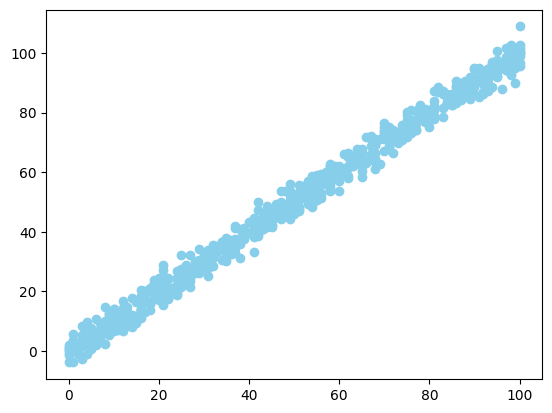

In [8]:
def gradient_descent(m_now, b_now, points, L):
    m_gradient = 0
    b_gradient = 0
    
    n = len(points)
    
    for i in range(n):
        x = points.iloc[i].x
        y = points.iloc[i].y
        
        m_gradient += -(2/n) * x * (y - (m_now*x + b_now))
        b_gradient += -(2/n) * (y - (m_now*x + b_now))
    m = m_now - m_gradient * L
    b = b_now - b_gradient * L 
    return m,b


m = 0
b = 0
L = 0.0001
epochs = 300

for i in range(epochs):
    if i % 50 == 0:
        print(f"Epoch: {i}")
    m,b = gradient_descent(m, b, df_train, L)


print(m, b)
plt.scatter(df_train.x, df_train.y, color="skyblue")
plt.plot(list(range(0, 100)), [m*x + b for x in range(0, 100)], color="orange")
plt.show()